## Data Visualisation

Data Link - https://archive.ics.uci.edu/dataset/94/spambase

Website Link - https://ejallen471.github.io/


This file performs preprocessing of the data and visualises the raw data to find patterns that could be utilised later

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [19]:
# Store data as dataframe and display the head (from data stored in file)

column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order',
                'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report',
                'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
                'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
                'word_freq_hp', 'word_freq_hpl', 'word_freq_george','word_freq_650', 'word_freq_lab', 'word_freq_labs',
                 'word_freq_telnet','word_freq_857', 'word_freq_data', 'word_freq_415','word_freq_85','word_freq_technology',
                'word_freq_1999', 'word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting',
                'word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
                
                'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
                
                'capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam'
                ]

filepath = '/Users/ejallen/Desktop/Machine Learning Project/02_Data/spambase/spambase.data'
df_spam = pd.read_csv(filepath, header=None, names=column_names)

display(df_spam.head())
df_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


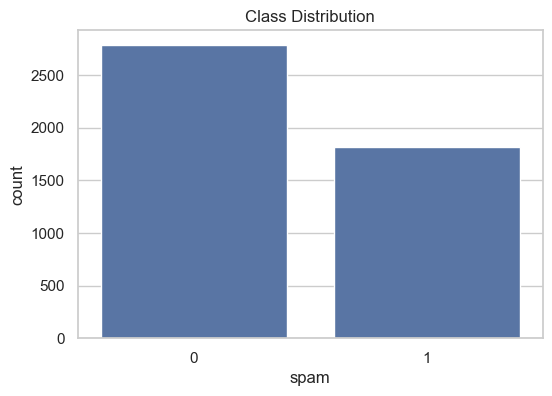

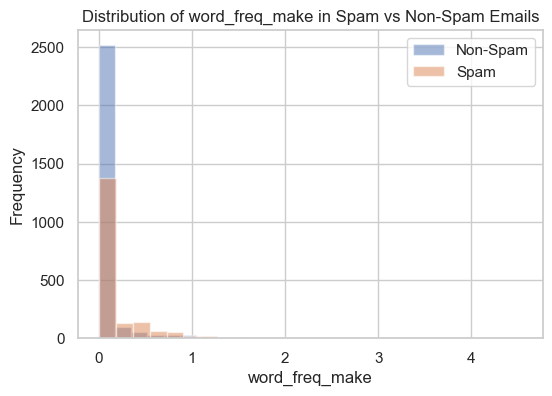

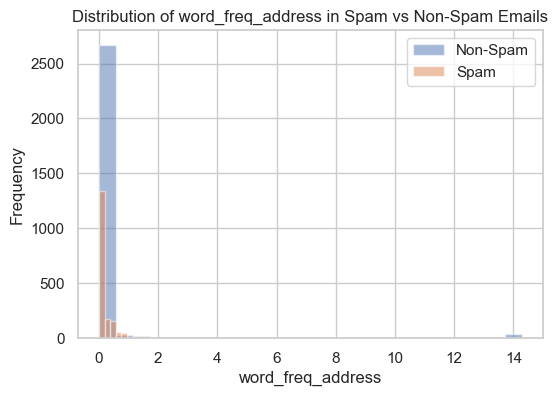

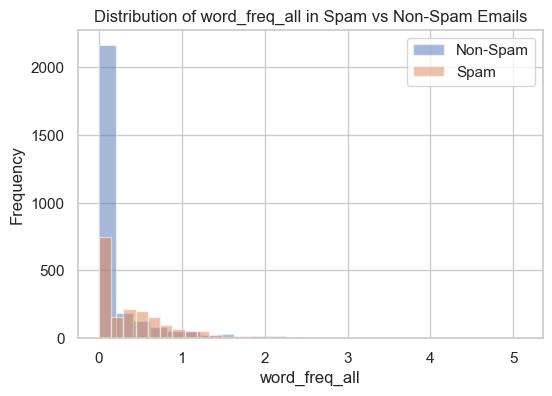

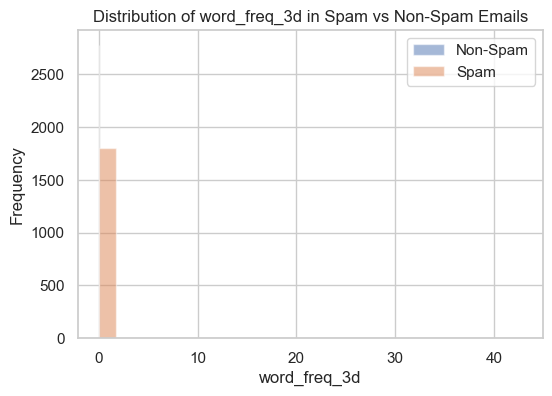

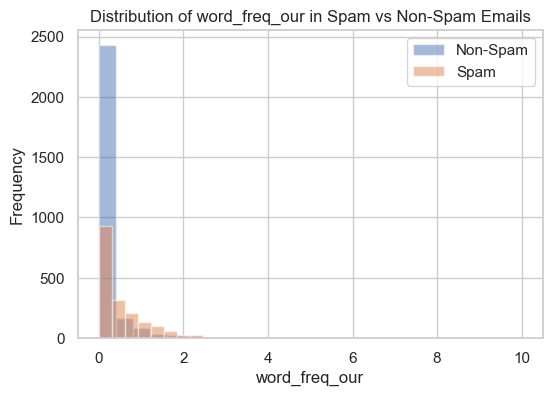

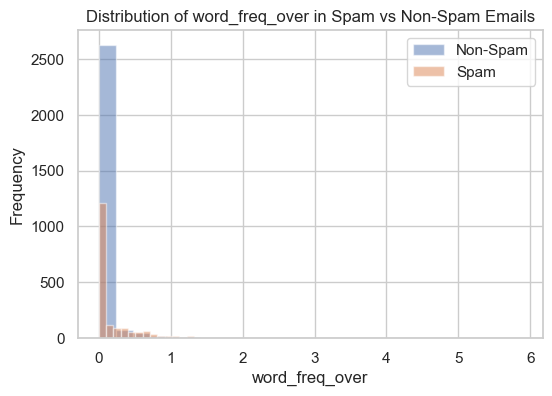

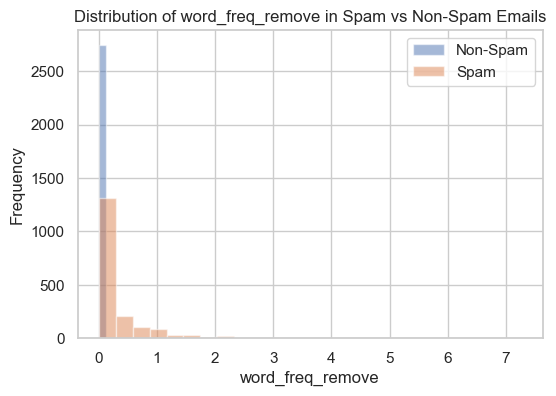

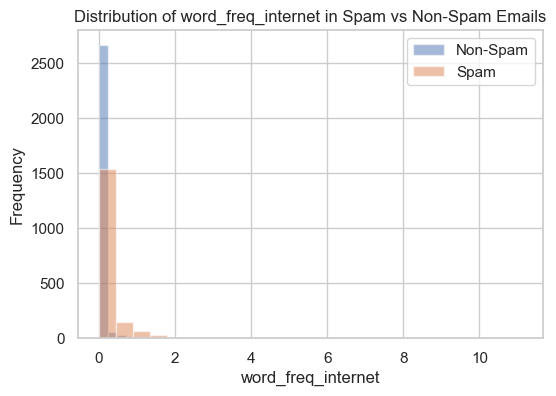

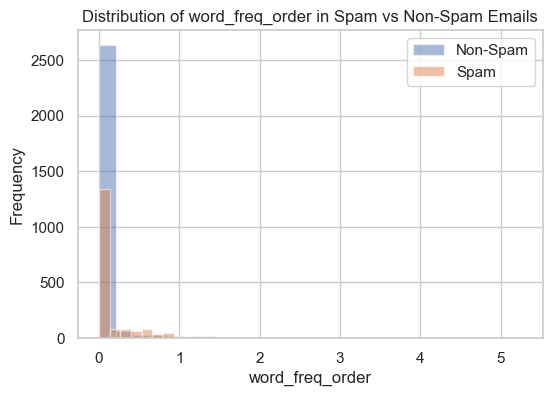

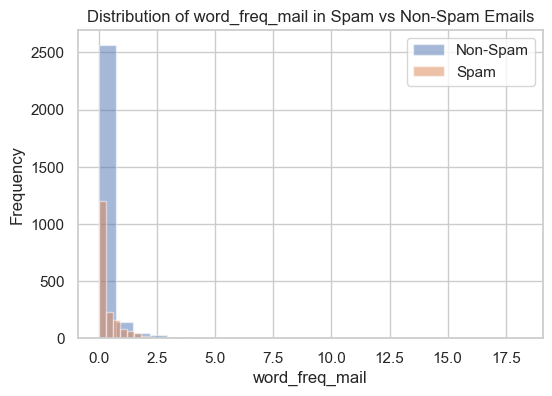

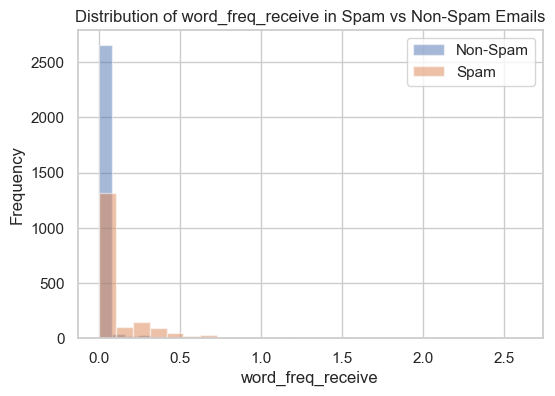

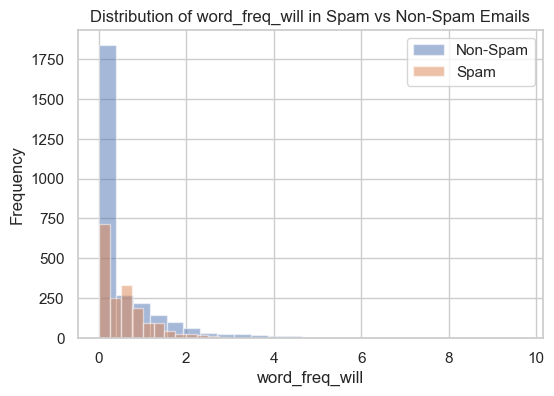

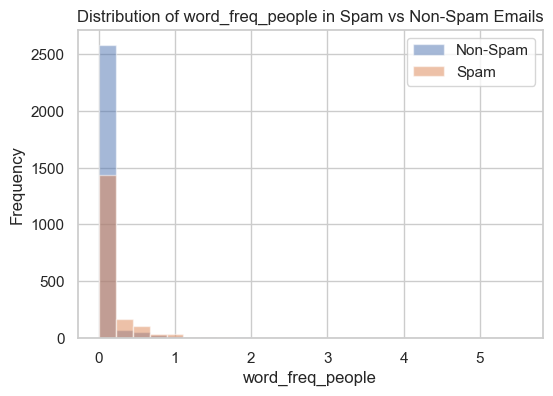

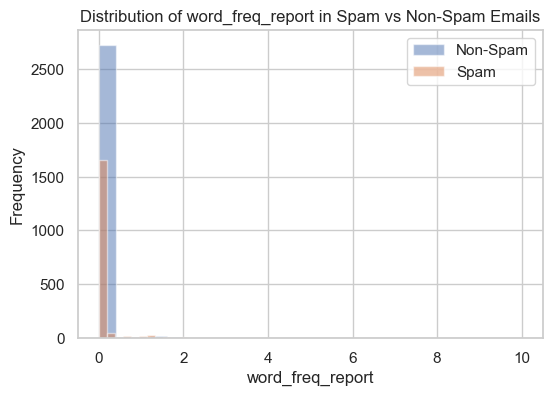

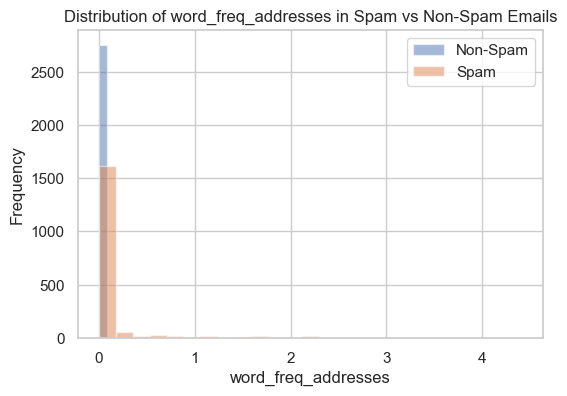

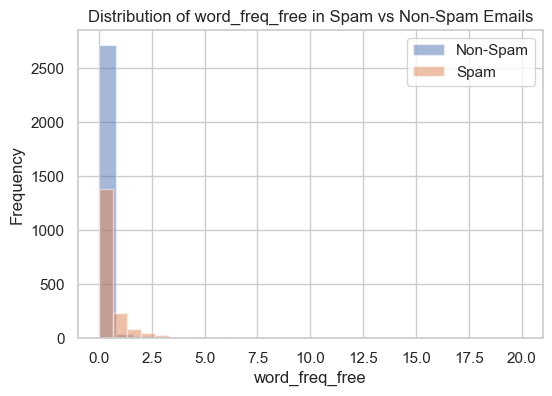

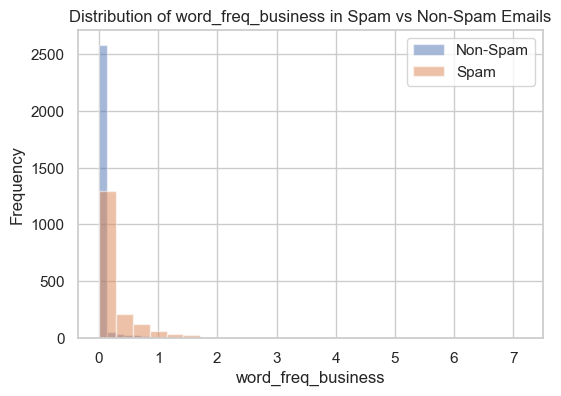

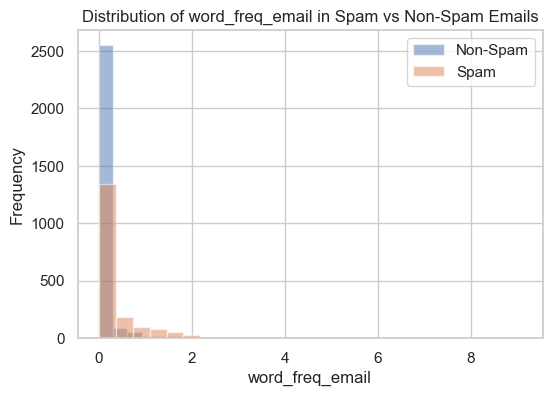

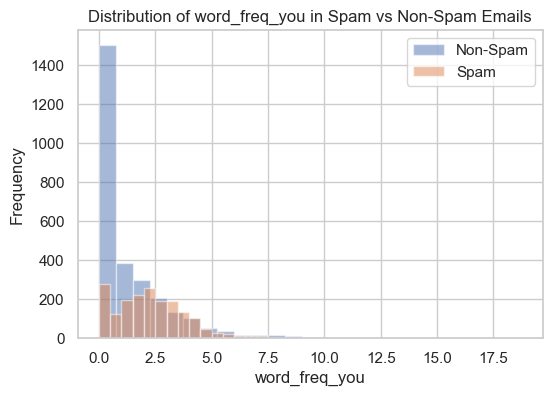

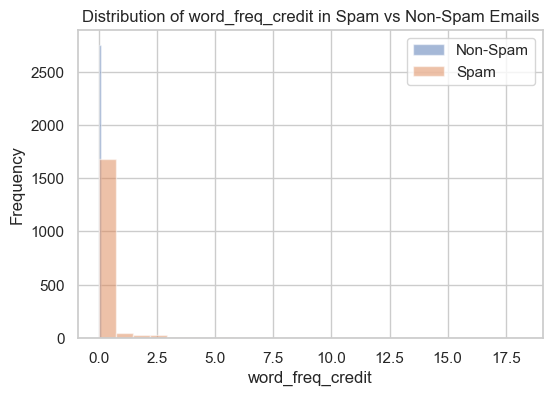

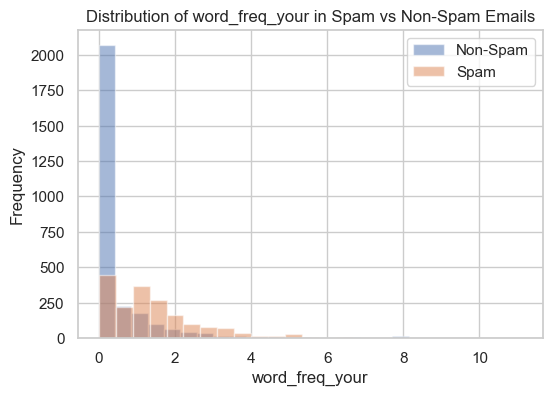

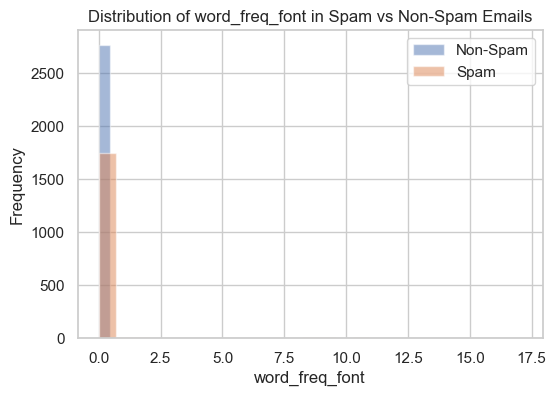

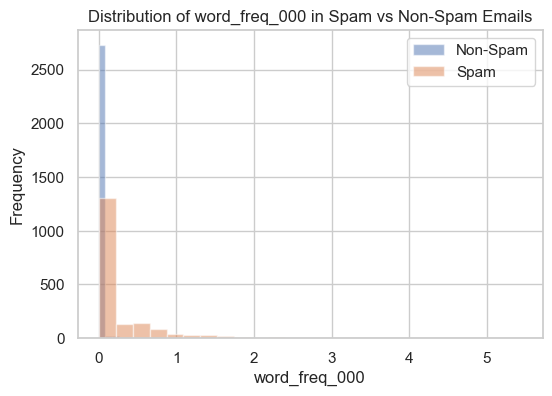

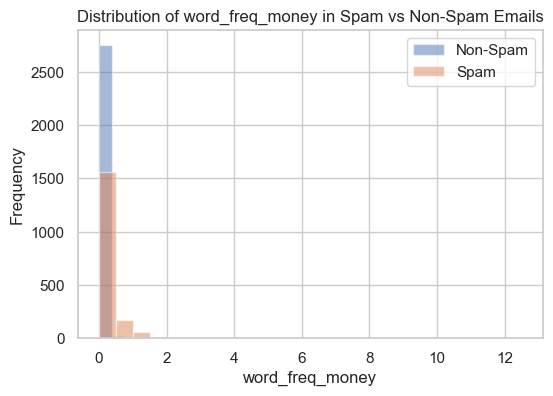

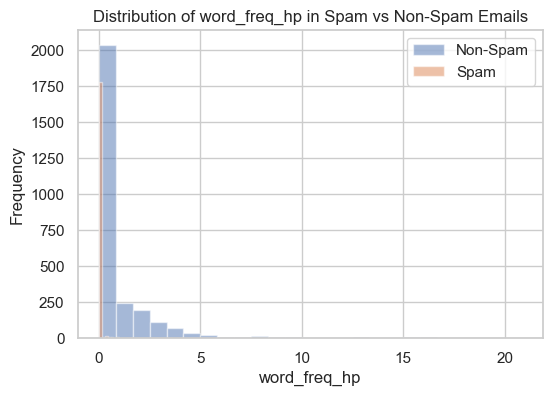

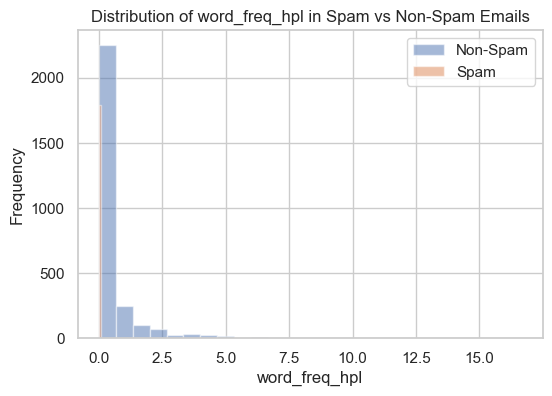

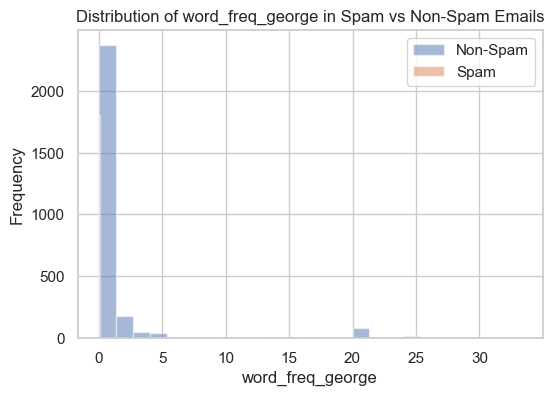

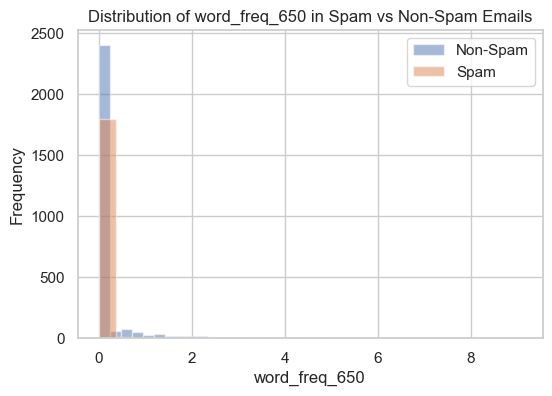

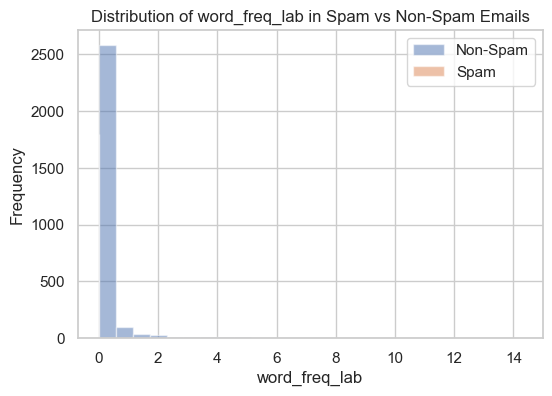

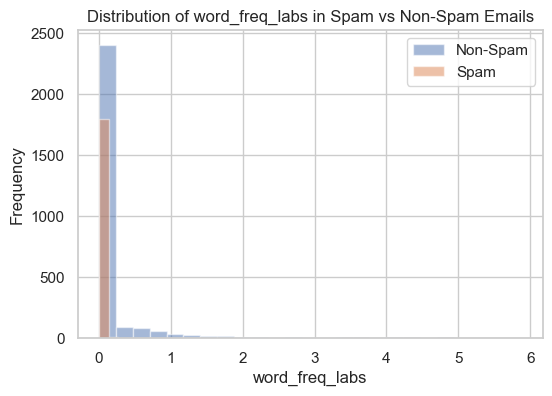

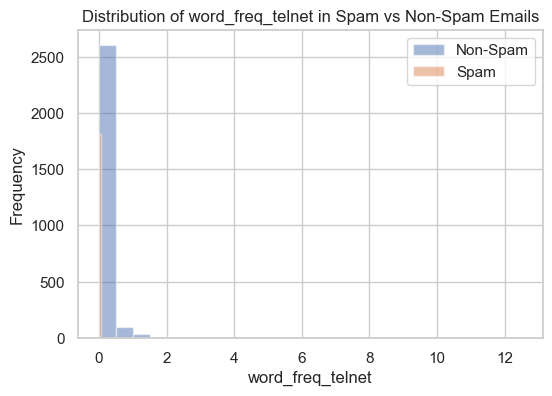

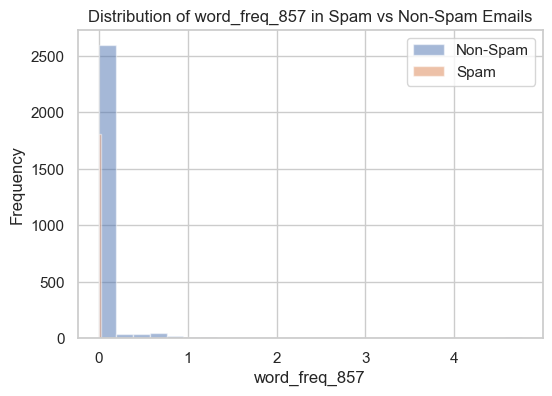

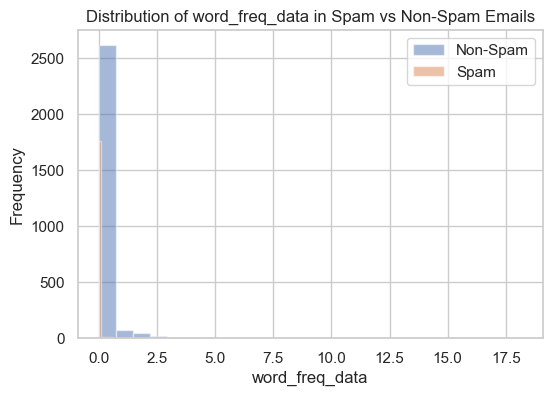

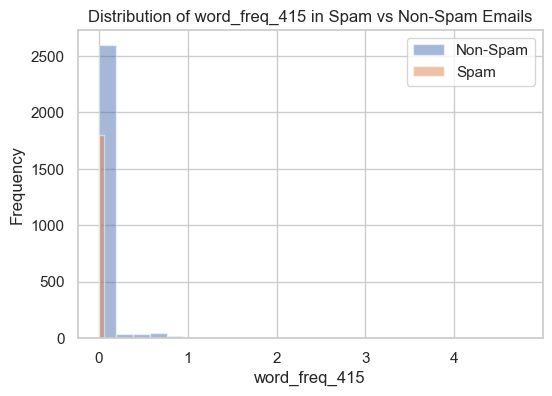

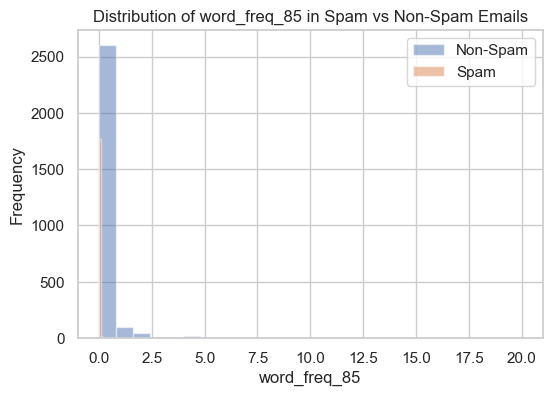

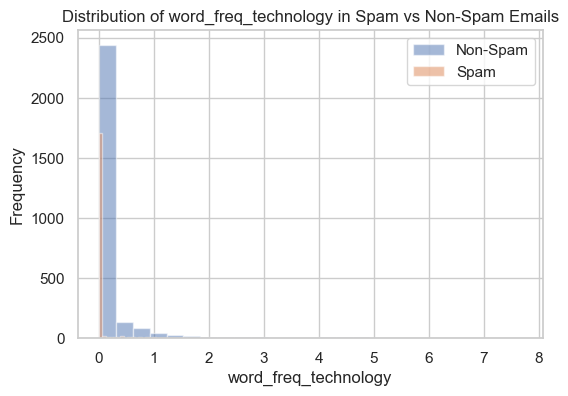

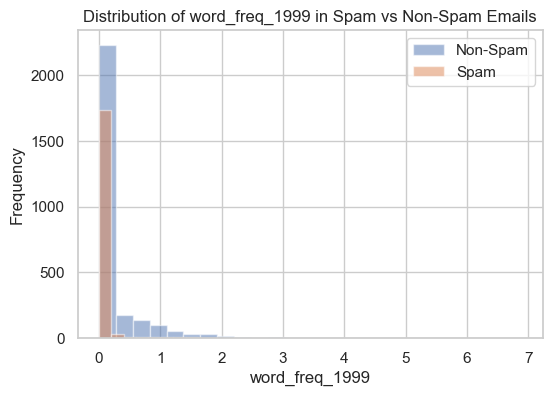

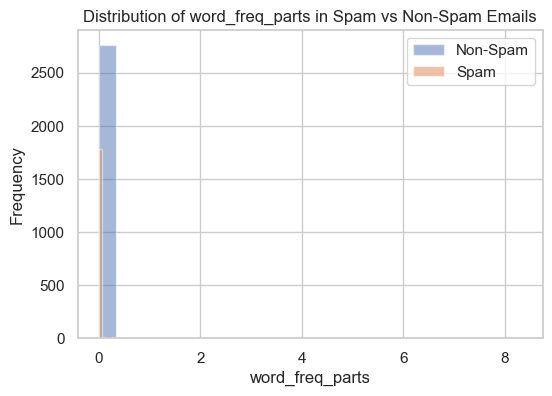

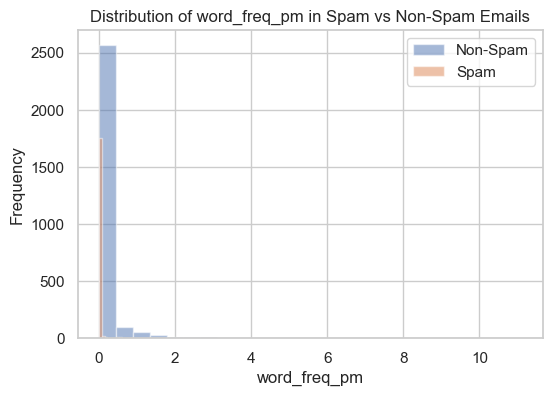

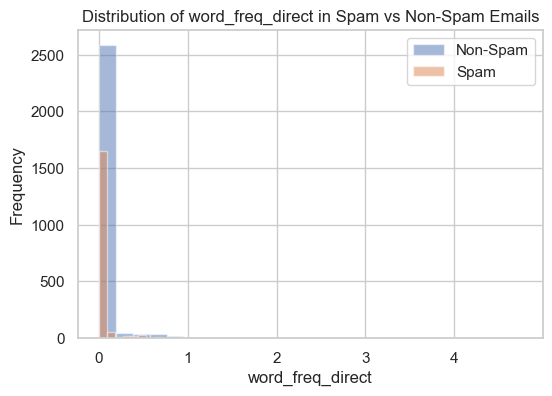

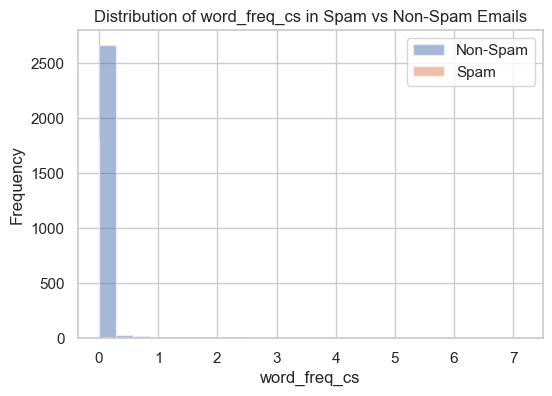

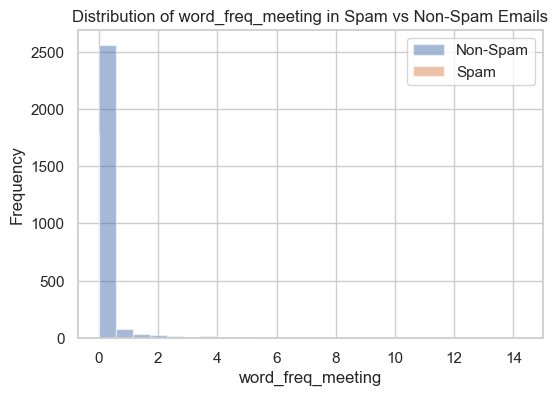

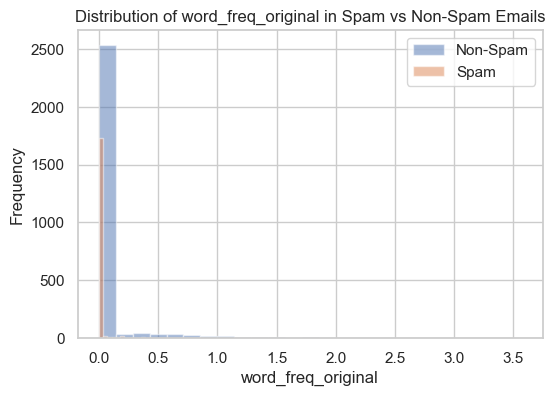

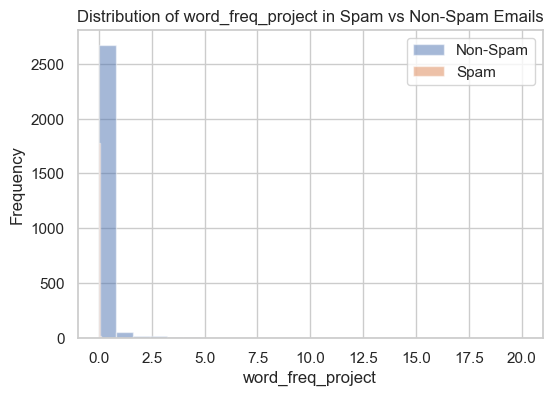

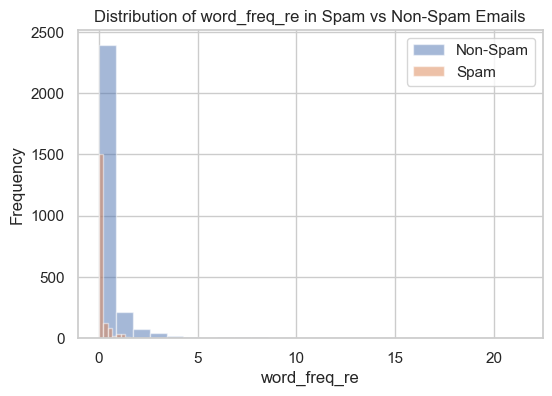

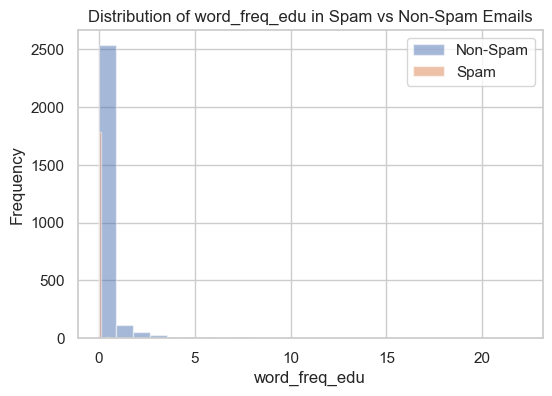

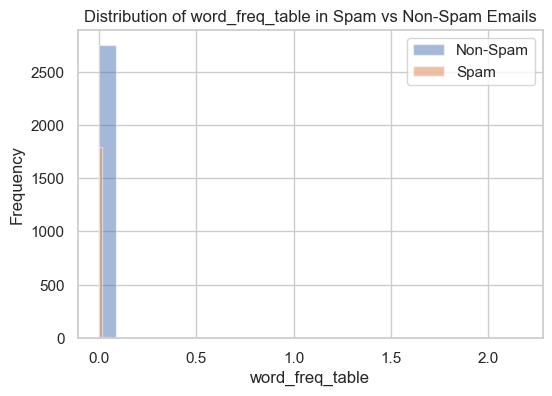

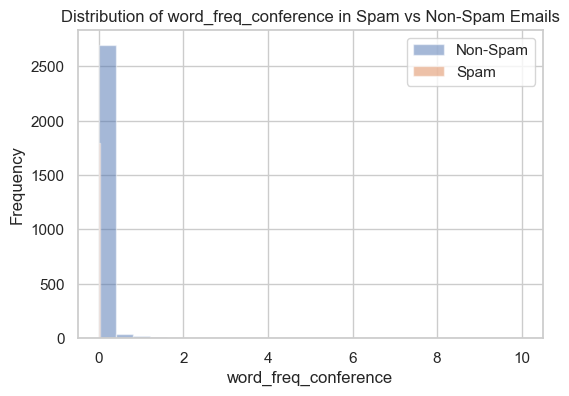

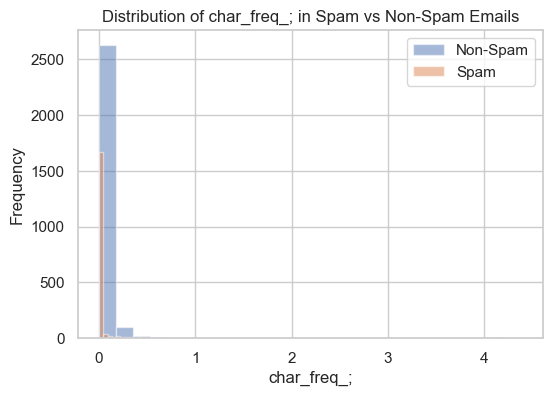

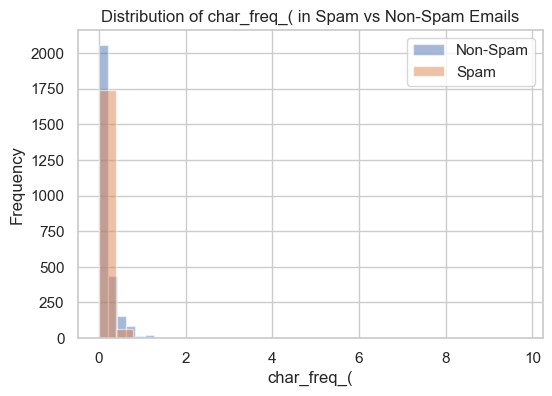

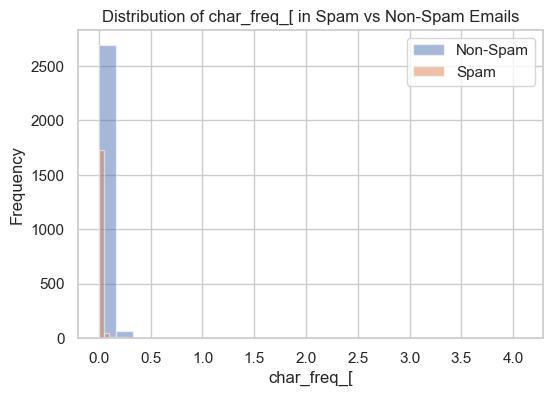

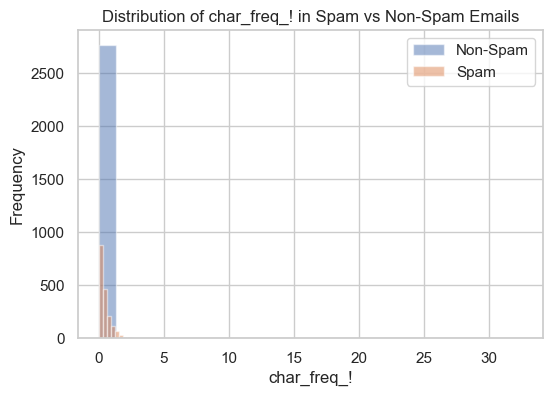

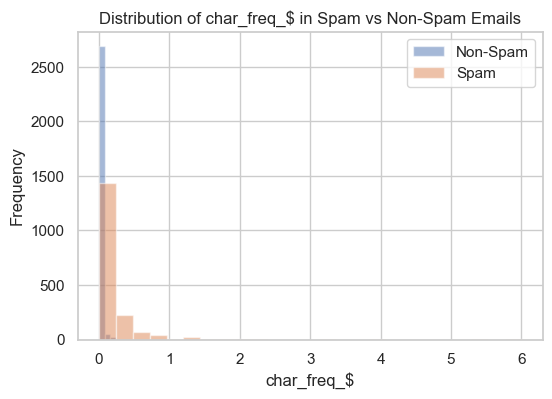

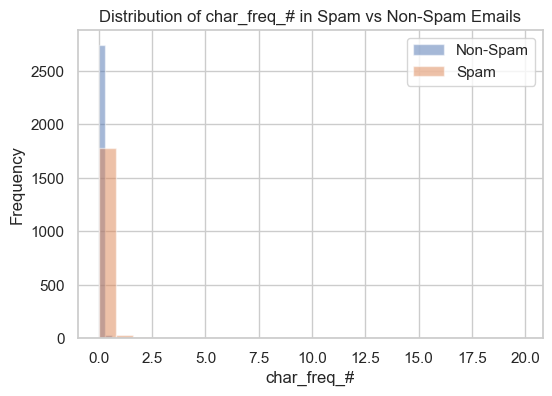

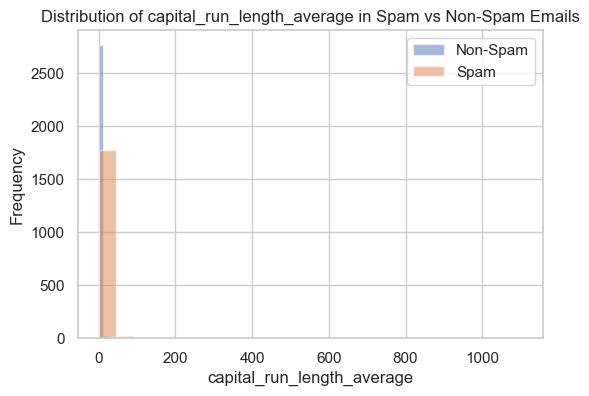

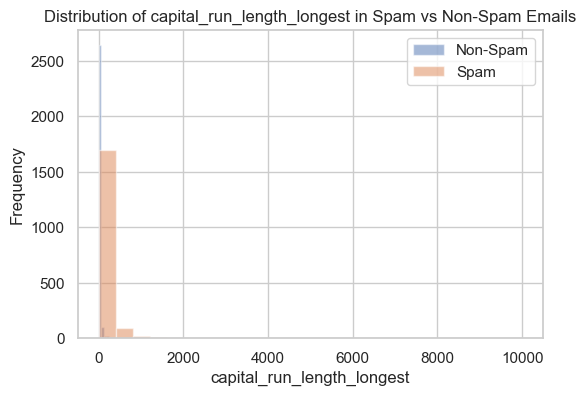

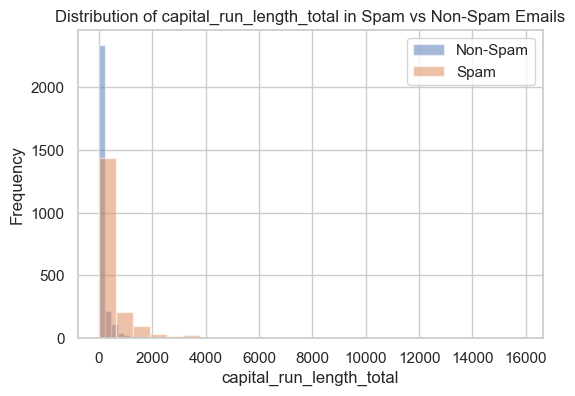

'\n# alternative visualisation - not as informative\n\ncapital_run_length_lst = column_names[column_names.index(\'capital_run_length_average\'):-1]\nplt.figure(figsize=(16, 5))\nfor attribute in capital_run_length_lst:\n    plt.subplot(1, 3, capital_run_length_lst.index(attribute) + 1)\n    sns.boxplot(x="spam", y=attribute, data=df_spam)\n    plt.title(attribute)\n\nplt.tight_layout()\nplt.show()\n'

In [26]:
# Visualise the distribution of the 'spam' class
plt.figure(figsize=(6, 4))
sns.countplot(x=spam", data=df_spam)
plt.title("Class Distribution")
plt.xlabel('Spam')
plt.ylabel('Frequency')
plt.show()

# Set style for seaborn plots
sns.set(style="whitegrid")

# create list without spam column
column_names_lst = column_names[:-1]

# Visualise the distribution of spam for each attribute
for column_name in column_names_lst:

    # Plotting histogram
    plt.figure(figsize=(6, 4))
    plt.hist(df_spam[df_spam['spam'] == 0][column_name], bins=25, alpha=0.5, label='Non-Spam')
    plt.hist(df_spam[df_spam['spam'] == 1][column_name], bins=25, alpha=0.5, label='Spam')
    plt.title(f'Distribution of {column_name} in Spam vs Non-Spam Emails')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()


"""
# alternative visualisation - not as informative

capital_run_length_lst = column_names[column_names.index('capital_run_length_average'):-1]
plt.figure(figsize=(16, 5))
for attribute in capital_run_length_lst:
    plt.subplot(1, 3, capital_run_length_lst.index(attribute) + 1)
    sns.boxplot(x="spam", y=attribute, data=df_spam)
    plt.title(attribute)

plt.tight_layout()
plt.show()
"""